# project - time series with pandas


In [2]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("C:\\Users\\pc\\Downloads\\UDEMY_TSA_FINAL\\UDEMY_TSA_FINAL\\Data\\UMTMVS.csv")

In [17]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [18]:
df.tail()

,DATE,UMTMVS
320,2018-09-01,516992.0
321,2018-10-01,527031.0
322,2018-11-01,495901.0
323,2018-12-01,490076.0
324,2019-01-01,466791.0


In [19]:
df.shape

(325, 2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
DATE      325 non-null object
UMTMVS    325 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


In [21]:
df.dtypes

DATE       object
UMTMVS    float64
dtype: object

In [22]:
 df["DATE"] = pd.to_datetime(df["DATE"])

In [23]:
df = df.set_index("DATE")

In [24]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [25]:
df.dtypes

UMTMVS    float64
dtype: object

In [26]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

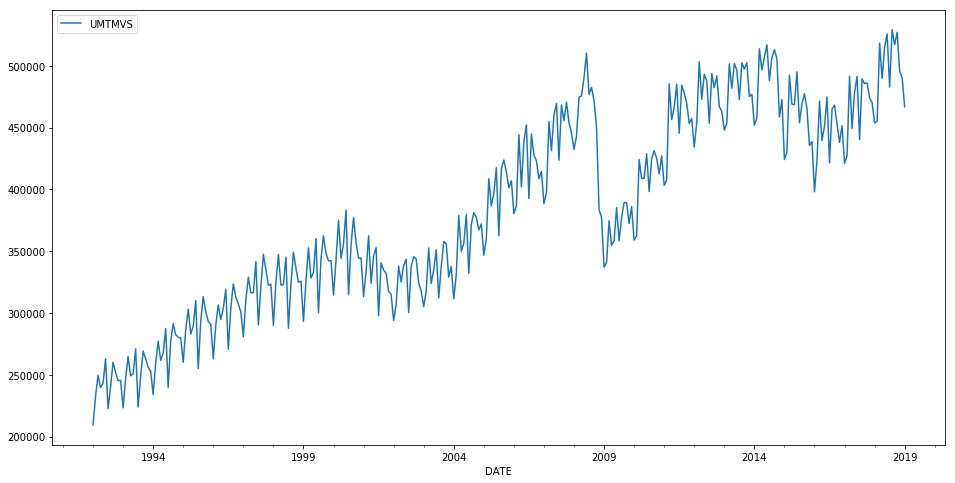

In [28]:
df.plot(figsize=(16,8))

# the percent increase in value from Jan 2009 to Jan 2019

In [31]:
df1 = df.loc['2009-01-01':'2019-01-01']

In [45]:
df1.head()

,UMTMVS
DATE,
2009-01-01,337101.0
2009-02-01,340896.0
2009-03-01,374521.0
2009-04-01,354790.0
2009-05-01,358584.0


In [48]:
(466791.0-337101.0)/337101.0*100

38.47214929650164

# percent decrease from Jan 2008 to Jan 2009?

In [50]:
df2 = df.loc["2008-01-01":'2009-01-01']

In [51]:
 df2.head()

,UMTMVS
DATE,
2008-01-01,432307.0
2008-02-01,442996.0
2008-03-01,474592.0
2008-04-01,475667.0
2008-05-01,490500.0


In [52]:
df2.tail()

,UMTMVS
DATE,
2008-09-01,471799.0
2008-10-01,450521.0
2008-11-01,383475.0
2008-12-01,377578.0
2009-01-01,337101.0


In [55]:
(337101.0-432307.0)/432307.0*100

-22.022775481313047

# the month with the least value after 2005

In [61]:
df3 = df.loc["2005-01-01":"2019-01-01"]

In [62]:
df3.head()

,UMTMVS
DATE,
2005-01-01,346845.0
2005-02-01,360009.0
2005-03-01,408699.0
2005-04-01,386657.0
2005-05-01,396886.0


In [64]:
df3["UMTMVS"].min()

337101.0

In [67]:
df3.index[df3["UMTMVS"]==337101.0]

DatetimeIndex(['2009-01-01'], dtype='datetime64[ns]', name='DATE', freq=None)

In [68]:
df3.idxmin(axis=0)

UMTMVS   2009-01-01
dtype: datetime64[ns]

# the 6 months have the highest value

In [74]:
df4 = df["UMTMVS"].resample(rule= "M").mean()
df4.sort_values(ascending = False).head(6)

DATE
2018-08-31    529157.0
2018-10-31    527031.0
2018-06-30    525660.0
2018-03-31    518285.0
2018-09-30    516992.0
2014-06-30    516935.0
Name: UMTMVS, dtype: float64

# the value difference between Jan 2008 and Jan 2009

In [76]:
df.loc["2008-01-01"]-df.loc["2009-01-01"]

UMTMVS    95206.0
dtype: float64

# barplot showing  average value in millions of dollars per year

In [77]:
df5 = df["UMTMVS"].resample(rule= "Y").mean()

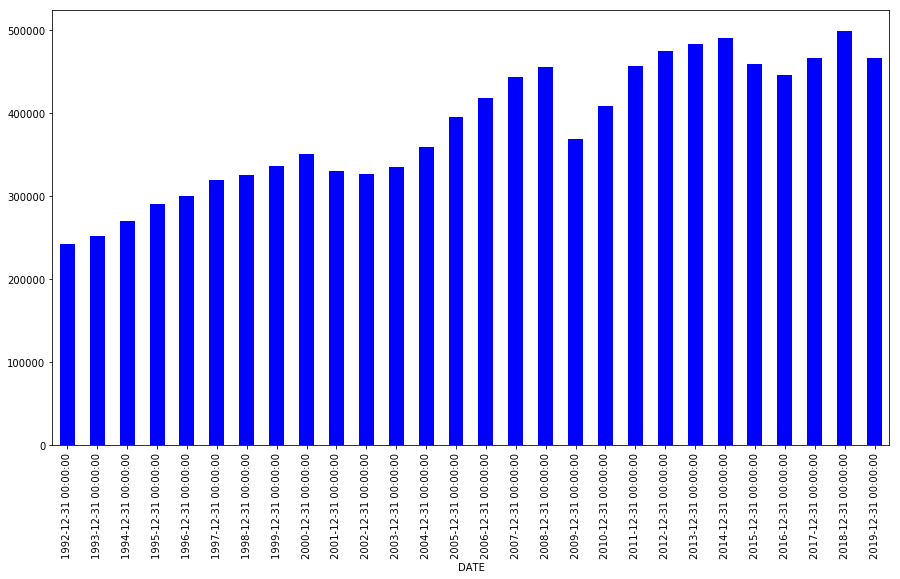

In [82]:
df5.plot.bar(figsize= (15,8), color="b")

In [83]:
df5.head()

DATE
1992-12-31    242002.000000
1993-12-31    251708.083333
1994-12-31    269842.666667
1995-12-31    289973.083333
1996-12-31    299765.666667
Freq: A-DEC, Name: UMTMVS, dtype: float64

In [86]:
df5.idxmax(axis =0)

Timestamp('2018-12-31 00:00:00', freq='A-DEC')

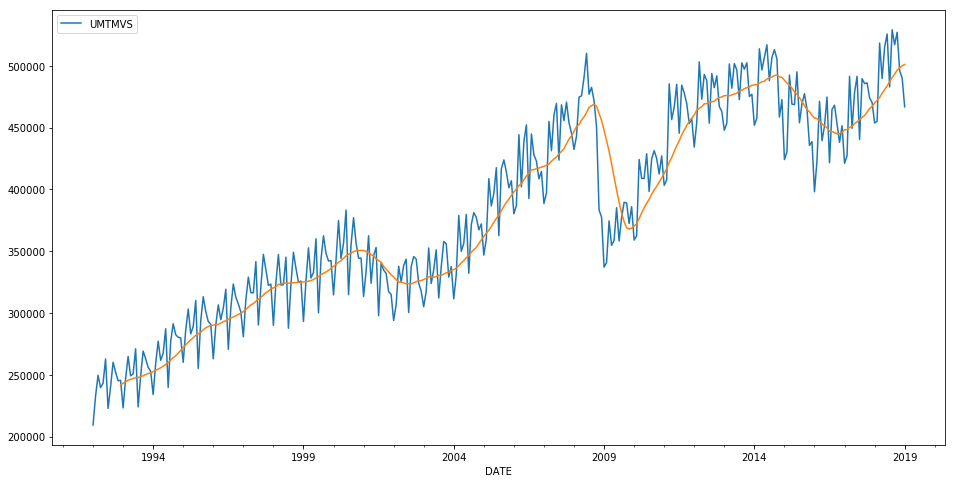

In [90]:
df.plot(figsize= (16,8))
df["UMTMVS"].rolling(window=12).mean().plot()

# How many months did it take to surpass that 2008 peak

In [92]:
df6 = df.loc["2008-01-01":"2009-01-01"]
df6

,UMTMVS
DATE,
2008-01-01,432307.0
2008-02-01,442996.0
2008-03-01,474592.0
2008-04-01,475667.0
2008-05-01,490500.0
2008-06-01,510081.0
2008-07-01,476948.0
2008-08-01,482530.0
2008-09-01,471799.0


In [95]:
df6.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [98]:
postpeak  = df.loc["2008-06-01":]

In [103]:
postpeak[postpeak>=510081.0].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [108]:
len(df.loc["2008-06-01":"2014-03-01"])

70